# Data Privacy Project by Emre & Yasin

## The Steps and Aim of the Project:

In this project, we want to implement privacy preserved ML techniques and we want to see how these techniques can be applied and how privacy measures affect utility. That's why we will use the steps below to implement our project:

1- Without any privacy method implementation, we will implement ML models and calculate them with metrics.

2- We will generalize the features and calculate the metrics.

3- We will implement K-anonymity , l-diversity and. t-closeness and see the effects in terms of privacy and utility.

4- We will create graphs and visualize our outputs.

## Step 1

Let's call the necessary libraries

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy.stats as stt



In [194]:
train = pd.read_csv('credit.csv')



In [7]:
train.head(7)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0


As can be seen in the figure most of the Null values are in 'Months since last delinquent' feature. Hence, we drop that feature.

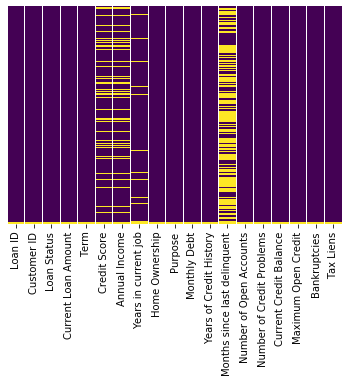

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
train.drop(columns = ['Months since last delinquent'], inplace = True)

We can't remove features 'Credit Score & Annual income' so we will use these features like this

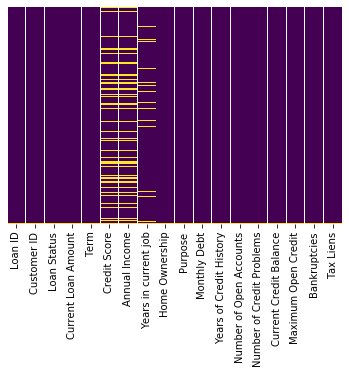

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
train.dropna(inplace = True, )

In [12]:
train

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [13]:
train.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77271 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    77271 non-null  object 
 1   Customer ID                77271 non-null  object 
 2   Loan Status                77271 non-null  object 
 3   Current Loan Amount        77271 non-null  float64
 4   Term                       77271 non-null  object 
 5   Credit Score               77271 non-null  float64
 6   Annual Income              77271 non-null  float64
 7   Years in current job       77271 non-null  object 
 8   Home Ownership             77271 non-null  object 
 9   Purpose                    77271 non-null  object 
 10  Monthly Debt               77271 non-null  float64
 11  Years of Credit History    77271 non-null  float64
 12  Number of Open Accounts    77271 non-null  float64
 13  Number of Credit Problems  77271 non-null  flo

In [15]:
#To see if there is null values like ? or other identations.
for i in range(len(train.iloc[0])):
    print(train.iloc[:,i].unique(), end ='\n')
    print('\n')
    

['14dd8831-6af5-400b-83ec-68e61888a048'
 '4eed4e6a-aa2f-4c91-8651-ce984ee8fb26'
 '77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a' ...
 '06eba04f-58fc-424a-b666-ed72aa008900'
 'e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7'
 '81ab928b-d1a5-4523-9a3c-271ebb01b4fb']


['981165ec-3274-42f5-a3b4-d104041a9ca9'
 '5efb2b2b-bf11-4dfd-a572-3761a2694725'
 'e777faab-98ae-45af-9a86-7ce5b33b1011' ...
 '77f2252a-b7d1-4b07-a746-1202a8304290'
 '2ced5f10-bd60-4a11-9134-cadce4e7b0a3'
 '3e45ffda-99fd-4cfc-b8b8-446f4a505f36']


['Fully Paid' 'Charged Off']


[  445412. 99999999.   347666. ...   241296.   100254.   274076.]


['Short Term' 'Long Term']


[ 709.  741.  721. 7290.  730.  678.  739.  728.  740.  743.  727.  723.
  747.  687.  750.  714.  724.  704.  688.  749.  746.  737.  729.  733.
  725.  745.  720.  718.  682. 7120.  680.  710.  598.  719. 6610.  652.
  736. 7380.  644.  672. 7370.  699.  751.  694.  657.  748.  666.  734.
  742.  705. 6240.  712.  685.  717.  722.  618.  676.  692. 7210.  732.
  649.  695. 

In [16]:
#Let's see the seperation of y values
train.loc[:,'Loan Status'].value_counts()

Fully Paid     61057
Charged Off    16214
Name: Loan Status, dtype: int64

In [17]:
# We will use the data name as train. As the data is train data.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77271 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    77271 non-null  object 
 1   Customer ID                77271 non-null  object 
 2   Loan Status                77271 non-null  object 
 3   Current Loan Amount        77271 non-null  float64
 4   Term                       77271 non-null  object 
 5   Credit Score               77271 non-null  float64
 6   Annual Income              77271 non-null  float64
 7   Years in current job       77271 non-null  object 
 8   Home Ownership             77271 non-null  object 
 9   Purpose                    77271 non-null  object 
 10  Monthly Debt               77271 non-null  float64
 11  Years of Credit History    77271 non-null  float64
 12  Number of Open Accounts    77271 non-null  float64
 13  Number of Credit Problems  77271 non-null  flo

In [18]:
#y = data['Loan Status']
#y

In [19]:
#x = data.drop(columns = 'Loan Status')
#x

In [20]:
train.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


Change data types to correct form.

In [21]:
categorical = set((
    'Loan ID',
    'Customer ID',
    'Loan Status',
    'Term',
    'Years in current job',
    'Home Ownership',
    'Purpose',
    
))

for name in categorical:
    if name == 'Years in Current Job':
        train[name] = str(train[name]).astype('category')
    else:
        train[name] = train[name].astype('category')

Let's look at our features.

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77271 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Loan ID                    77271 non-null  category
 1   Customer ID                77271 non-null  category
 2   Loan Status                77271 non-null  category
 3   Current Loan Amount        77271 non-null  float64 
 4   Term                       77271 non-null  category
 5   Credit Score               77271 non-null  float64 
 6   Annual Income              77271 non-null  float64 
 7   Years in current job       77271 non-null  category
 8   Home Ownership             77271 non-null  category
 9   Purpose                    77271 non-null  category
 10  Monthly Debt               77271 non-null  float64 
 11  Years of Credit History    77271 non-null  float64 
 12  Number of Open Accounts    77271 non-null  float64 
 13  Number of Credit Problems  7727

#### We think LabelEncoding is best option for us because we don't want one hot encoding to apply k-anonymity and other privacy measures

In [23]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

for name in categorical:
    train[name] = labelencoder.fit_transform(train[name])
    

In [24]:
train

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,19786,23840,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,29876,57929,1,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,34549,20094,0,206602.0,1,7290.0,896857.0,1,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,9836,36201,1,217646.0,1,730.0,1184194.0,10,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,33328,47756,1,210584.0,1,719.0,783389.0,0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,15897,11453,1,147070.0,1,725.0,475437.0,7,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1712,30035,1,99999999.0,1,732.0,1289416.0,0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,56562,11270,1,103136.0,1,742.0,1150545.0,6,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Loan Status',axis=1), 
                                                    train['Loan Status'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

## Evaluation

We can check precision,recall,f1-score using classification report!

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.23      0.37      4828
           1       0.83      1.00      0.91     18354

    accuracy                           0.84     23182
   macro avg       0.91      0.62      0.64     23182
weighted avg       0.86      0.84      0.80     23182



In [31]:
accuricies = []


In [32]:
accuricies.append(accuracy_score(y_test,predictions))
print(accuracy_score(y_test,predictions))


0.8391424380985247


In [33]:
accuricies

[0.8391424380985247]

#### We don't want to create every algorithm every time one by one. So we create functions for every algorihm

In [34]:
#Log Regression Pipeline
def log_regression(train):
    
    X_train, X_test, y_train, y_test = train_test_split(train.drop('Loan Status',axis=1), 
                                                    train['Loan Status'], test_size=0.30, 
                                                    random_state=101)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    print(classification_report(y_test,predictions))
    print(accuracy_score(y_test,predictions))


## Decision Tree Implementation

We'll start just by training a single decision tree.

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
accuricies

[0.8391424380985247]

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [37]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))
accuricies.append(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.48      0.47      0.47      4828
           1       0.86      0.87      0.86     18354

    accuracy                           0.78     23182
   macro avg       0.67      0.67      0.67     23182
weighted avg       0.78      0.78      0.78     23182

0.7827193512207747


In [38]:
def decision_tree(train):
    X_train, X_test, y_train, y_test = train_test_split(train.drop('Loan Status',axis=1), 
                                                    train['Loan Status'], test_size=0.30, 
                                                    random_state=101)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    print(classification_report(y_test,predictions))
    print(accuracy_score(y_test,predictions))
    

## Random Forests

Now let's compare the decision tree model to a random forest.

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rfc_pred = rfc.predict(X_test)

In [41]:
print(confusion_matrix(y_test,rfc_pred))

[[ 1355  3473]
 [   48 18306]]


In [42]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.28      0.43      4828
           1       0.84      1.00      0.91     18354

    accuracy                           0.85     23182
   macro avg       0.90      0.64      0.67     23182
weighted avg       0.87      0.85      0.81     23182



In [43]:
print(accuracy_score(y_test,rfc_pred))

0.848114916745751


In [44]:
accuricies.append(accuracy_score(y_test,rfc_pred))

In [45]:
accuricies

[0.8391424380985247, 0.7827193512207747, 0.848114916745751]

In [46]:
def random_forest(train):
    X_train, X_test, y_train, y_test = train_test_split(train.drop('Loan Status',axis=1), 
                                                    train['Loan Status'], test_size=0.30, 
                                                    random_state=101)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    print(classification_report(y_test,rfc_pred))
    print(accuracy_score(y_test,rfc_pred))

## Step 2

At Step 2, we will first anonymize dataset and after that we will k-anonymize the dataset according to different k values and measure their effect. 

### Generalization on features

### Numeric Value Generalization
#### 1.Current Loan Amount

In [47]:
train.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,19786,23840,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,29876,57929,1,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0


In [48]:
loan_amount = np.asarray(train['Current Loan Amount'])
credit_score = np.asarray(train['Credit Score'])

(array([66242.,     0.,     0., 11029.]),
 array([1.54220000e+04, 2.50115662e+07, 5.00077105e+07, 7.50038548e+07,
        9.99999990e+07]),
 <a list of 4 Patch objects>)

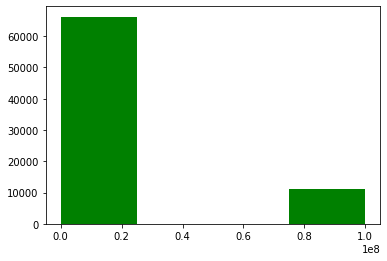

In [49]:
plt.hist(train['Current Loan Amount'], bins = 4, color = 'g', )


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


(array([    0.,     0., 77271.,     0.]),
 array([0.5 , 0.75, 1.  , 1.25, 1.5 ]),
 <a list of 4 Patch objects>)

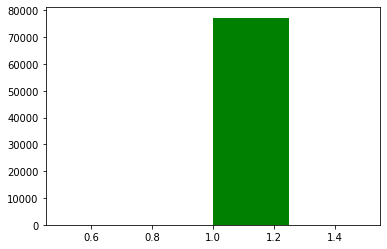

In [50]:
plt.hist(loan_amount>0.7 , bins = 4, color = 'g', )


In [51]:
train[train['Current Loan Amount'] <= 600000]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
3,29876,57929,1,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,34549,20094,0,206602.0,1,7290.0,896857.0,1,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,9836,36201,1,217646.0,1,730.0,1184194.0,10,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,34830,43978,1,548746.0,1,678.0,2559110.0,2,3,3,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,30488,57147,1,44484.0,1,717.0,1152426.0,1,1,13,6280.64,21.0,6.0,0.0,961932.0,0.0,0.0,0.0
99994,33328,47756,1,210584.0,1,719.0,783389.0,0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,15897,11453,1,147070.0,1,725.0,475437.0,7,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99997,56562,11270,1,103136.0,1,742.0,1150545.0,6,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


(array([ 213.,  254.,  372.,  606.,  594.,  800.,  703.,  726., 1142.,
         549.]),
 array([15422. , 23878.8, 32335.6, 40792.4, 49249.2, 57706. , 66162.8,
        74619.6, 83076.4, 91533.2, 99990. ]),
 <a list of 10 Patch objects>)

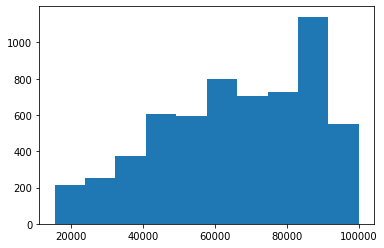

In [52]:
plt.hist(train[train['Current Loan Amount'] <= 100000]['Current Loan Amount'])

In [53]:
trainx = train.copy()
trainx.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,19786,23840,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0


In [54]:
def anonymizer(trainx, index, first_indice, second_indice):
    a = trainx[trainx.iloc[:,index]>= first_indice][trainx.iloc[:,index]<= second_indice].iloc[:,index]
    mean = int((first_indice + second_indice) / 2)
    for i in a.keys():
        trainx.iloc[:,index][i] = mean
    


In [55]:
trainx[trainx.iloc[:,3]>= 80000][trainx.iloc[:,3]<= 95000].iloc[:,3]

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


23       91894.0
81       89320.0
117      86174.0
151      87846.0
160      87912.0
          ...   
99319    92972.0
99825    89804.0
99832    88924.0
99938    90398.0
99944    88968.0
Name: Current Loan Amount, Length: 1506, dtype: float64

In [56]:
anonymizer(trainx, 3 , 0, 25000 )
for i in range(15):
    anonymizer(trainx, 3 , (25001 + i*5000), (25000 +(i+1)*5000)) 

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([1726., 1434., 1110., 2002.,  824., 1738.,  868., 2489.,  928.,
        1210.]),
 array([100012. , 110008.8, 120005.6, 130002.4, 139999.2, 149996. ,
        159992.8, 169989.6, 179986.4, 189983.2, 199980. ]),
 <a list of 10 Patch objects>)

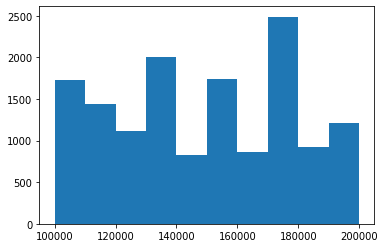

In [57]:
plt.hist(train[train['Current Loan Amount'] >= 100000][train['Current Loan Amount'] <= 200000]['Current Loan Amount'])

In [58]:
trainx[trainx.iloc[:,3]>= 130000][trainx.iloc[:,3]<= 140000].iloc[:,3]

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


32       130174.0
58       130922.0
101      132792.0
126      133078.0
150      133804.0
           ...   
99614    130240.0
99679    134068.0
99704    135124.0
99847    130394.0
99919    134222.0
Name: Current Loan Amount, Length: 2002, dtype: float64

In [59]:
for i in range(20):
    anonymizer(trainx, 3 , (100001 + i*5000), (100000 +(i+1)*5000))

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(array([ 956., 2922., 2758.,  879., 1019., 1202., 2998.,  780.,  876.,
         664.]),
 array([200002. , 209996.6, 219991.2, 229985.8, 239980.4, 249975. ,
        259969.6, 269964.2, 279958.8, 289953.4, 299948. ]),
 <a list of 10 Patch objects>)

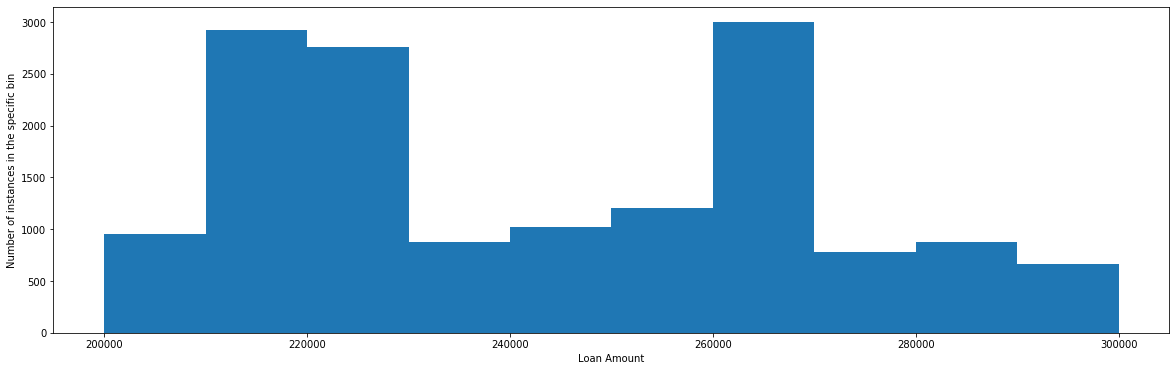

In [60]:
fig = plt.figure(figsize=(20,6))
plt.ylabel('Number of instances in the specific bin')
plt.xlabel('Loan Amount')
plt.hist(train[train['Current Loan Amount'] >= 200000][train['Current Loan Amount'] <= 300000]['Current Loan Amount'])

In [61]:
for i in range(40):
    anonymizer(trainx, 3 , (200001 + i*2500), (200000 +(i+1)*2500))

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([ 956., 2922., 2758.,  879., 1019., 1202., 2998.,  780.,  876.,
         664.]),
 array([200002. , 209996.6, 219991.2, 229985.8, 239980.4, 249975. ,
        259969.6, 269964.2, 279958.8, 289953.4, 299948. ]),
 <a list of 10 Patch objects>)

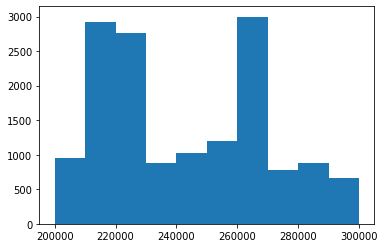

In [62]:
plt.hist(train[train['Current Loan Amount'] >=200000][train['Current Loan Amount'] <= 300000]['Current Loan Amount'])

In [63]:
for i in range(40):
    anonymizer(trainx, 3 , (300001 + i*2500), (300000 +(i+1)*2500))

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([ 985.,  939., 2067., 1905., 1007., 1226.,  622.,  637.,  737.,
        1153.]),
 array([300014. , 310010.8, 320007.6, 330004.4, 340001.2, 349998. ,
        359994.8, 369991.6, 379988.4, 389985.2, 399982. ]),
 <a list of 10 Patch objects>)

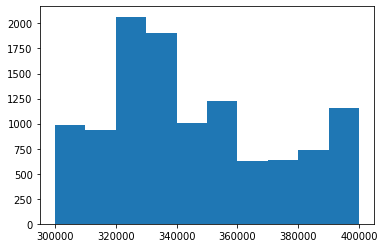

In [64]:
plt.hist(train[train['Current Loan Amount'] >= 300000][train['Current Loan Amount'] <= 400000]['Current Loan Amount'])

In [65]:
for i in range(40):
    anonymizer(trainx, 3 , (400001 + i*2500), (400000 +(i+1)*2500))

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([255., 521., 689., 889., 858., 745., 365., 216., 220., 183.]),
 array([500104., 510092., 520080., 530068., 540056., 550044., 560032.,
        570020., 580008., 589996., 599984.]),
 <a list of 10 Patch objects>)

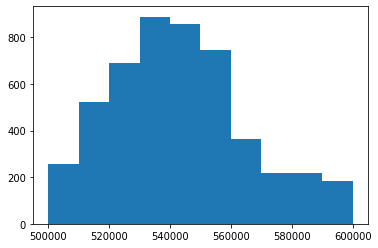

In [66]:
plt.hist(train[train['Current Loan Amount'] >= 500000][train['Current Loan Amount'] <= 600000]['Current Loan Amount'])

In [67]:
for i in range(20):
    anonymizer(trainx, 3 , (500001 + i*5000), (500000 +(i+1)*5000))

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([116., 126.,  84.,  86.,  72., 258., 755., 670., 676., 660.]),
 array([700062. , 708980.8, 717899.6, 726818.4, 735737.2, 744656. ,
        753574.8, 762493.6, 771412.4, 780331.2, 789250. ]),
 <a list of 10 Patch objects>)

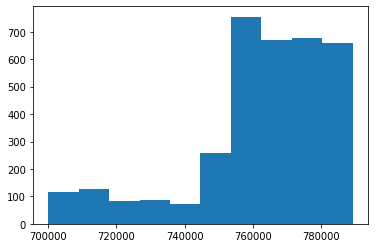

In [68]:
plt.hist(train[train['Current Loan Amount'] >= 700000][train['Current Loan Amount'] <= 800000]['Current Loan Amount'])

In [69]:
for i in range(20):
    anonymizer(trainx, 3 , (600001 + i*5000), (600000 +(i+1)*5000))

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [70]:
for i in range(10):
    anonymizer(trainx, 3 , (700001 + i*10000), (700000 +(i+1)*10000))

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([    0.,     0.,     0.,     0.,     0., 11029.,     0.,     0.,
            0.,     0.]),
 array([99999998.5, 99999998.6, 99999998.7, 99999998.8, 99999998.9,
        99999999. , 99999999.1, 99999999.2, 99999999.3, 99999999.4,
        99999999.5]),
 <a list of 10 Patch objects>)

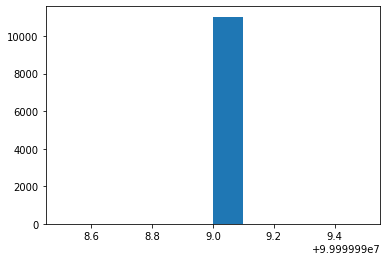

In [71]:
plt.hist(train[train['Current Loan Amount'] >= 800000][train['Current Loan Amount'] <= 99999999]['Current Loan Amount'])

In [72]:
trainx['Current Loan Amount']

0          446250.0
2        99999999.0
3          348750.0
5          206250.0
6          218750.0
            ...    
99994      211250.0
99995      147500.0
99996    99999999.0
99997      102500.0
99998      532500.0
Name: Current Loan Amount, Length: 77271, dtype: float64

In [73]:
trainx

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,446250.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,19786,23840,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,29876,57929,1,348750.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,34549,20094,0,206250.0,1,7290.0,896857.0,1,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,9836,36201,1,218750.0,1,730.0,1184194.0,10,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,33328,47756,1,211250.0,1,719.0,783389.0,0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,15897,11453,1,147500.0,1,725.0,475437.0,7,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1712,30035,1,99999999.0,1,732.0,1289416.0,0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,56562,11270,1,102500.0,1,742.0,1150545.0,6,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


#### 2.Credit Score Generalization

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([0., 0., 0., 0., 0., 9., 0., 0., 0., 0.]),
 array([7509.5, 7509.6, 7509.7, 7509.8, 7509.9, 7510. , 7510.1, 7510.2,
        7510.3, 7510.4, 7510.5]),
 <a list of 10 Patch objects>)

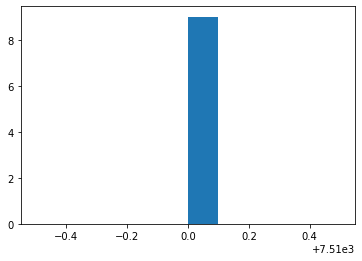

In [74]:
plt.hist(trainx[trainx['Credit Score'] >7500][trainx['Credit Score'] <7600]['Credit Score'])

(array([7.2977e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.2000e+01, 6.7500e+02, 3.5870e+03]),
 array([ 585. , 1277.5, 1970. , 2662.5, 3355. , 4047.5, 4740. , 5432.5,
        6125. , 6817.5, 7510. ]),
 <a list of 10 Patch objects>)

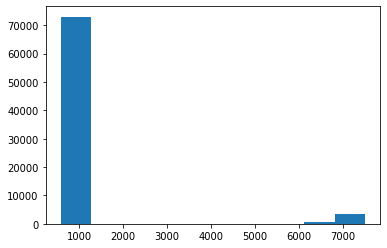

In [75]:
plt.hist(train[train['Credit Score'] >6]['Credit Score'])

In [76]:
trainx[trainx['Credit Score'] >500][trainx['Credit Score'] <600]['Credit Score']

49       598.0
604      594.0
1237     596.0
3262     597.0
3299     594.0
         ...  
97982    594.0
98084    599.0
98308    588.0
99240    589.0
99824    599.0
Name: Credit Score, Length: 170, dtype: float64

In [77]:
anonymizer(trainx, 5 , (500), (600))


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [78]:
for i in range(13):
    anonymizer(trainx, 5 , (601 + i*3), (601 +(i+1)*3))

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [79]:
for i in range(5):
    anonymizer(trainx, 5 , (641 + i*2), (640 +(i+1)*2))
for i in range(5):
    anonymizer(trainx, 5 , (651 + i*2), (650 +(i+1)*2))
for i in range(5):
    anonymizer(trainx, 5 , (641 + i*2), (640 +(i+1)*2))
    
#No need to do anymore as there are enough equivalent values for credit values higher that 650.

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [80]:
anonymizer(trainx, 5 , (5800), (6200))
for i in range(3):
    anonymizer(trainx, 5 , (6201 + i*100), (6500 +(i+1)*100))
for i in range(6):
    anonymizer(trainx, 5 , (6501 + i*50), (6500 +(i+1)*50))
for i in range(8):
    anonymizer(trainx, 5 , (6801 + i*25), (6800 +(i+1)*25))
for i in range(10):
    anonymizer(trainx, 5 , (7001 + i*10), (7000 +(i+1)*10))
for i in range(10):
    anonymizer(trainx, 5 , (7101 + i*10), (7100 +(i+1)*10))
for i in range(10):
    anonymizer(trainx, 5 , (7201 + i*10), (7200 +(i+1)*10))
for i in range(10):
    anonymizer(trainx, 5 , (7301 + i*10), (7300 +(i+1)*10))
for i in range(10):
    anonymizer(trainx, 5 , (7401 + i*10), (7400 +(i+1)*10))                
for i in range(10):
    anonymizer(trainx, 5 , (7501 + i*10), (7500 +(i+1)*10))    


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [81]:
trainx[trainx['Credit Score'] >680][trainx['Credit Score'] <690]['Credit Score']

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


20       687.0
25       688.0
40       682.0
82       688.0
99       685.0
         ...  
99811    684.0
99885    687.0
99893    689.0
99894    689.0
99962    687.0
Name: Credit Score, Length: 2971, dtype: float64

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([ 73.,  56.,  70.,  82.,  94., 103., 116., 105., 125.,  97.]),
 array([602. , 604.7, 607.4, 610.1, 612.8, 615.5, 618.2, 620.9, 623.6,
        626.3, 629. ]),
 <a list of 10 Patch objects>)

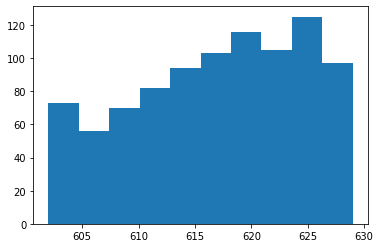

In [82]:
plt.hist(trainx[trainx['Credit Score'] >600][trainx['Credit Score'] <630]['Credit Score'])

In [83]:
trainx

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,446250.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,19786,23840,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,29876,57929,1,348750.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,34549,20094,0,206250.0,1,7285.0,896857.0,1,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,9836,36201,1,218750.0,1,730.0,1184194.0,10,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,33328,47756,1,211250.0,1,719.0,783389.0,0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,15897,11453,1,147500.0,1,725.0,475437.0,7,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1712,30035,1,99999999.0,1,732.0,1289416.0,0,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,56562,11270,1,102500.0,1,742.0,1150545.0,6,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


### 3. Years in current job

(array([ 5155., 25301.,  7363.,  6605.,  4908.,  5465.,  4567.,  4506.,
         3701.,  9700.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

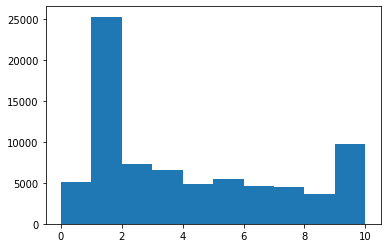

In [84]:
plt.hist(trainx['Years in current job'])

In [85]:
anonymizer(trainx, 7, 0, 5)
anonymizer(trainx, 7, 5, 10)

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### 4. Home Ownership

(array([  178.,     0.,     0., 37492.,     0.,     0.,  6835.,     0.,
            0., 32766.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

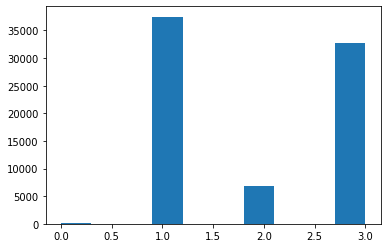

In [86]:
plt.hist(trainx['Home Ownership'])

In [87]:

anonymizer(trainx, 8, 0, 2)
anonymizer(trainx, 8, 2, 4)

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(array([44505.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 32766.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

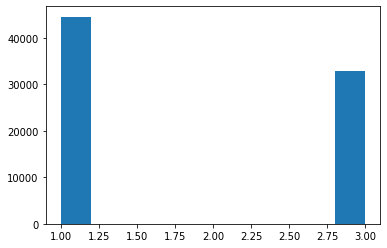

In [88]:
plt.hist(trainx['Home Ownership'])

In [89]:
trainx['Home Ownership'].value_counts()

1    44505
3    32766
Name: Home Ownership, dtype: int64

In [90]:
trainx

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,446250.0,1,709.0,1167493.0,7,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,19786,23840,1,99999999.0,1,741.0,2231892.0,7,1,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,29876,57929,1,348750.0,0,721.0,806949.0,2,1,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,34549,20094,0,206250.0,1,7285.0,896857.0,2,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,9836,36201,1,218750.0,1,730.0,1184194.0,7,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,33328,47756,1,211250.0,1,719.0,783389.0,2,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,15897,11453,1,147500.0,1,725.0,475437.0,7,1,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1712,30035,1,99999999.0,1,732.0,1289416.0,2,3,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,56562,11270,1,102500.0,1,742.0,1150545.0,7,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


### 5. Monthly Debt

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([ 9829., 20820., 20261., 12776.,  6638.,  3400.,  1596.,   890.,
          422.,   247.]),
 array([7.4100000e+00, 6.9979850e+03, 1.3988560e+04, 2.0979135e+04,
        2.7969710e+04, 3.4960285e+04, 4.1950860e+04, 4.8941435e+04,
        5.5932010e+04, 6.2922585e+04, 6.9913160e+04]),
 <a list of 10 Patch objects>)

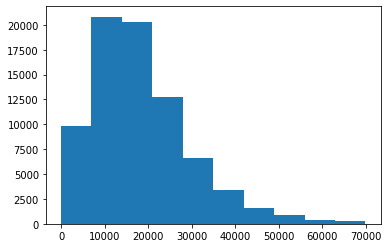

In [91]:

plt.hist(trainx[trainx['Monthly Debt'] >0][trainx['Monthly Debt'] <70000]['Monthly Debt'])

In [92]:
for i in range(20):
    anonymizer(trainx, 10, (0 + i*2000) , (0 + (i+1) * 2000))
for i in range(8):
    anonymizer(trainx, 10, (40000 + i*5000) , (40000 + (i+1) * 5000))
    

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(array([1340.,    0., 2676.,    0.,    0., 3727.,    0., 4577.,    0.,
        5584.]),
 array([1000., 1800., 2600., 3400., 4200., 5000., 5800., 6600., 7400.,
        8200., 9000.]),
 <a list of 10 Patch objects>)

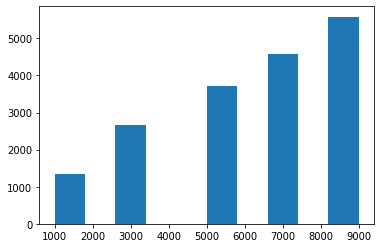

In [93]:
plt.hist(trainx[trainx['Monthly Debt'] >0][trainx['Monthly Debt'] <10000]['Monthly Debt'])

In [94]:
trainx['Monthly Debt'].value_counts()

13000.00     6532
15000.00     6465
11000.00     6294
17000.00     5883
9000.00      5584
             ... 
96177.05        1
112683.87       1
84823.98        1
97238.96        1
103778.95       1
Name: Monthly Debt, Length: 167, dtype: int64

### 6. Years of Credit History

In [95]:
trainx.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,446250.0,1,709.0,1167493.0,7,1,5,5000.0,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,19786,23840,1,99999999.0,1,741.0,2231892.0,7,1,3,29000.0,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([ 5278., 17560., 24315., 15383.,  7115.,  4229.,  1844.,   865.,
          309.,   122.]),
 array([ 5.1 ,  9.58, 14.06, 18.54, 23.02, 27.5 , 31.98, 36.46, 40.94,
        45.42, 49.9 ]),
 <a list of 10 Patch objects>)

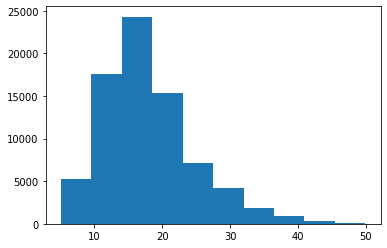

In [96]:
plt.hist(trainx[trainx['Years of Credit History'] > 5 ][trainx['Years of Credit History']<50]['Years of Credit History'])

In [97]:
anonymizer(trainx, 11, 0 , 5 )
for i in range(10):
    anonymizer(trainx, 11, 5 + i * 3  , 5 + (i+1) *3 )
for i in range(3):
    anonymizer(trainx, 11, 35 + i * 5  , 35 + (i+1) *5 )

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([2118.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7966.]),
 array([6. , 6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <a list of 10 Patch objects>)

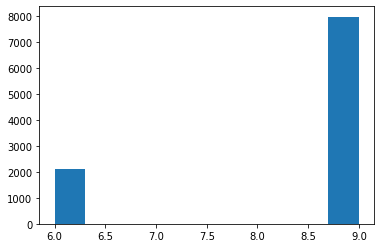

In [98]:
plt.hist(trainx[trainx['Years of Credit History'] > 5 ][trainx['Years of Credit History']<10]['Years of Credit History'])

### 7. Number of Open Accounts

(array([ 1348., 10881., 20066., 19477.,  8893.,  8332.,  4396.,  2033.,
         1013.,   446.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

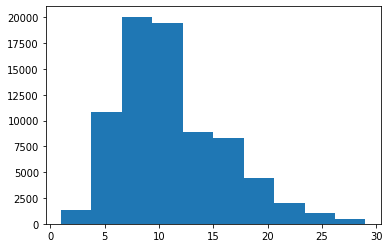

In [99]:
plt.hist(trainx[trainx['Number of Open Accounts'] > 0 ][trainx['Number of Open Accounts']<30]['Number of Open Accounts'])

In [100]:
for i in range(10):
    anonymizer(trainx, 12, 0 + i *3 , 0 +(i+1)*3 )



/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### 8. Number of Credit Problems

In [101]:
trainx['Number of Credit Problems'].value_counts()

0.0     66728
1.0      9122
2.0       986
3.0       269
4.0        93
5.0        39
6.0        16
7.0         7
8.0         4
9.0         2
11.0        2
15.0        1
12.0        1
10.0        1
Name: Number of Credit Problems, dtype: int64

In [102]:
anonymizer(trainx, 13, 0, 2)
anonymizer(trainx, 13, 3, 5)
anonymizer(trainx, 13, 6, 10)


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### 9. Current Credit Balance

(array([13973., 18845., 14513.,  9675.,  6380.,  4247.,  2952.,  2057.,
         1277.,   815.]),
 array([     0. ,  89993.5, 179987. , 269980.5, 359974. , 449967.5,
        539961. , 629954.5, 719948. , 809941.5, 899935. ]),
 <a list of 10 Patch objects>)

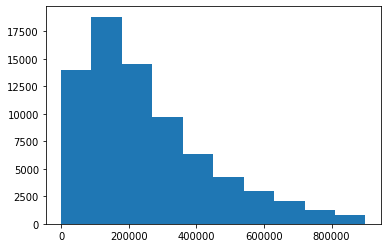

In [103]:
plt.hist(trainx[trainx['Current Credit Balance'] <900000]['Current Credit Balance'])

In [104]:
for i in range(90):
    anonymizer(trainx, 14, 0 + 10000 *i , 0 + 10000 *(i+1) )

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [105]:
trainx

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,446250.0,1,709.0,1167493.0,7,1,5,5000.0,18.0,4.0,1.0,225000.0,416746.0,1.0,0.0
2,19786,23840,1,99999999.0,1,741.0,2231892.0,7,1,3,29000.0,15.0,16.0,1.0,295000.0,750090.0,0.0,0.0
3,29876,57929,1,348750.0,0,721.0,806949.0,2,1,3,9000.0,12.0,7.0,1.0,255000.0,386958.0,0.0,0.0
5,34549,20094,0,206250.0,1,7285.0,896857.0,2,1,3,17000.0,18.0,4.0,1.0,215000.0,272448.0,0.0,0.0
6,9836,36201,1,218750.0,1,730.0,1184194.0,7,1,3,11000.0,18.0,13.0,1.0,125000.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,33328,47756,1,211250.0,1,719.0,783389.0,2,1,7,3000.0,18.0,4.0,1.0,5000.0,259160.0,0.0,0.0
99995,15897,11453,1,147500.0,1,725.0,475437.0,7,1,11,3000.0,21.0,4.0,1.0,45000.0,658548.0,0.0,0.0
99996,1712,30035,1,99999999.0,1,732.0,1289416.0,2,3,3,13000.0,9.0,22.0,1.0,155000.0,509234.0,0.0,0.0
99997,56562,11270,1,102500.0,1,742.0,1150545.0,7,3,3,7000.0,18.0,10.0,1.0,105000.0,537548.0,1.0,0.0


### 10. Maximum Open Credit

(array([32389., 26227., 10603.,  3973.,  1653.,   818.,   443.,   250.,
          152.,   114.]),
 array([      0. ,  399515.6,  799031.2, 1198546.8, 1598062.4, 1997578. ,
        2397093.6, 2796609.2, 3196124.8, 3595640.4, 3995156. ]),
 <a list of 10 Patch objects>)

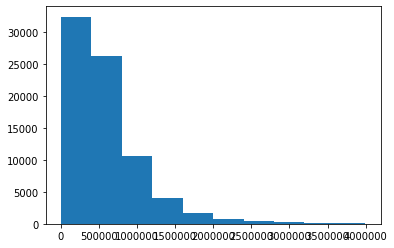

In [106]:
plt.hist(trainx[trainx['Maximum Open Credit'] <4000000]['Maximum Open Credit'])

In [107]:
for i in range(125):
    anonymizer(trainx, 15, 0 + 20000 *i , 0 + 20000 *(i+1) )

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### 11. Bankruptcies

In [108]:
trainx['Bankruptcies']

0        1.0
2        0.0
3        0.0
5        0.0
6        1.0
        ... 
99994    0.0
99995    0.0
99996    0.0
99997    1.0
99998    0.0
Name: Bankruptcies, Length: 77271, dtype: float64

We don't change these because we don't need to as we are going to apply k anonymity.

### 12. Tax Liens

In [109]:
trainx['Tax Liens'].value_counts()

0.0     75805
1.0      1016
2.0       289
3.0        79
4.0        45
5.0        13
6.0        11
7.0         7
9.0         2
11.0        2
15.0        1
10.0        1
Name: Tax Liens, dtype: int64

In [110]:
anonymizer(trainx, 17, 0, 2)
anonymizer(trainx, 17, 3, 5)
anonymizer(trainx, 17, 6, 15)

/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/emreuzel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [111]:
trainx['Tax Liens'].unique()

array([ 1.,  4., 10.])

In [112]:
log_regression(trainx)

              precision    recall  f1-score   support

           0       0.87      0.25      0.39      4828
           1       0.83      0.99      0.91     18354

    accuracy                           0.84     23182
   macro avg       0.85      0.62      0.65     23182
weighted avg       0.84      0.84      0.80     23182

0.8364248123544129


/Users/emreuzel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [113]:
random_forest(trainx)

              precision    recall  f1-score   support

           0       0.96      0.28      0.43      4828
           1       0.84      1.00      0.91     18354

    accuracy                           0.85     23182
   macro avg       0.90      0.64      0.67     23182
weighted avg       0.86      0.85      0.81     23182

0.8475972737468725


In [114]:
decision_tree(trainx)

              precision    recall  f1-score   support

           0       0.49      0.48      0.48      4828
           1       0.86      0.87      0.87     18354

    accuracy                           0.79     23182
   macro avg       0.68      0.67      0.67     23182
weighted avg       0.79      0.79      0.79     23182

0.7862997152963506


In [115]:
accuricies

[0.8391424380985247, 0.7827193512207747, 0.848114916745751]

In [116]:
accuricies2 = [0.8364248123544129, 0.7846173755499957, 0.848114916745751]

# K-anonymity

In [117]:
train[train['Current Loan Amount'] < 99999998]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
3,29876,57929,1,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,34549,20094,0,206602.0,1,7290.0,896857.0,1,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,9836,36201,1,217646.0,1,730.0,1184194.0,10,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,34830,43978,1,548746.0,1,678.0,2559110.0,2,3,3,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,30488,57147,1,44484.0,1,717.0,1152426.0,1,1,13,6280.64,21.0,6.0,0.0,961932.0,0.0,0.0,0.0
99994,33328,47756,1,210584.0,1,719.0,783389.0,0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99995,15897,11453,1,147070.0,1,725.0,475437.0,7,2,11,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99997,56562,11270,1,103136.0,1,742.0,1150545.0,6,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [118]:
trainx.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [119]:
trainx.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,5228,38105,1,446250.0,1,709.0,1167493.0,7,1,5,5000.0,18.0,4.0,1.0,225000.0,410000.0,1.0,1.0
2,19786,23840,1,99999999.0,1,741.0,2231892.0,7,1,3,29000.0,15.0,16.0,1.0,295000.0,750000.0,0.0,1.0
3,29876,57929,1,348750.0,0,721.0,806949.0,2,1,3,9000.0,12.0,7.0,1.0,255000.0,390000.0,0.0,1.0


In [120]:
floats = set(('Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'))

for name in floats:
    trainx[name] = trainx[name].astype('float64')

floats = set(( 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income',
        'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit',))

categoricals = set(('Loan ID', 'Customer ID', 'Loan Status','Term','Years in current job','Home Ownership', 'Bankruptcies',
       'Tax Liens'))
for name in floats:
    trainx[name] = trainx[name].astype('float64')
for y in categoricals:
    trainx[y] = trainx[y].astype('category')

In [121]:
trainx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77271 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    77271 non-null  float64
 1   Customer ID                77271 non-null  float64
 2   Loan Status                77271 non-null  float64
 3   Current Loan Amount        77271 non-null  float64
 4   Term                       77271 non-null  float64
 5   Credit Score               77271 non-null  float64
 6   Annual Income              77271 non-null  float64
 7   Years in current job       77271 non-null  float64
 8   Home Ownership             77271 non-null  float64
 9   Purpose                    77271 non-null  float64
 10  Monthly Debt               77271 non-null  float64
 11  Years of Credit History    77271 non-null  float64
 12  Number of Open Accounts    77271 non-null  float64
 13  Number of Credit Problems  77271 non-null  flo

In [122]:
def get_spans(df, partition, scale=None):
    """
    :param        df: the dataframe for which to calculate the spans
    :param partition: the partition for which to calculate the spans
    :param     scale: if given, the spans of each column will be divided
                      by the value in `scale` for that column
    :        returns: The spans of all columns in the partition
    """
    spans = {}
    for column in df.columns:
        if column in categorical:
            span = len(df[column][partition].unique())
        else:
            span = df[column][partition].max()-df[column][partition].min()
        if scale is not None:
            span = span/scale[column]
        spans[column] = span
    return spans

In [123]:
full_spans = get_spans(trainx, trainx.index)

In [124]:
def split(df, partition, column):
    """
    :param        df: The dataframe to split
    :param partition: The partition to split
    :param    column: The column along which to split
    :        returns: A tuple containing a split of the original partition
    """
    dfp = df[column][partition]
    if column in categorical:
        values = dfp.unique()
        lv = set(values[:len(values)//2])
        rv = set(values[len(values)//2:])
        return dfp.index[dfp.isin(lv)], dfp.index[dfp.isin(rv)]
    else:        
        median = dfp.median()
        dfl = dfp.index[dfp < median]
        dfr = dfp.index[dfp >= median]
        return (dfl, dfr)

In [125]:
def is_k_anonymous(df, partition, sensitive_column, k=3):
    """
    :param               df: The dataframe on which to check the partition.
    :param        partition: The partition of the dataframe to check.
    :param sensitive_column: The name of the sensitive column
    :param                k: The desired k
    :returns               : True if the partition is valid according to our k-anonymity criteria, False otherwise.
    """
    if len(partition) < k:
        return False
    return True

def partition_dataset(df, feature_columns, sensitive_column, scale, is_valid):
    """
    :param               df: The dataframe to be partitioned.
    :param  feature_columns: A list of column names along which to partition the dataset.
    :param sensitive_column: The name of the sensitive column (to be passed on to the `is_valid` function)
    :param            scale: The column spans as generated before.
    :param         is_valid: A function that takes a dataframe and a partition and returns True if the partition is valid.
    :returns               : A list of valid partitions that cover the entire dataframe.
    """
    finished_partitions = []
    partitions = [df.index]
    while partitions:
        partition = partitions.pop(0)
        spans = get_spans(df[feature_columns], partition, scale)
        for column, span in sorted(spans.items(), key=lambda x:-x[1]):
            lp, rp = split(df, partition, column)
            if not is_valid(df, lp, sensitive_column) or not is_valid(df, rp, sensitive_column):
                continue
            partitions.extend((lp, rp))
            break
        else:
            finished_partitions.append(partition)
    return finished_partitions


In [126]:
len(np.unique(trainx['Current Loan Amount']))

206

In [127]:
trainx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77271 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan ID                    77271 non-null  float64
 1   Customer ID                77271 non-null  float64
 2   Loan Status                77271 non-null  float64
 3   Current Loan Amount        77271 non-null  float64
 4   Term                       77271 non-null  float64
 5   Credit Score               77271 non-null  float64
 6   Annual Income              77271 non-null  float64
 7   Years in current job       77271 non-null  float64
 8   Home Ownership             77271 non-null  float64
 9   Purpose                    77271 non-null  float64
 10  Monthly Debt               77271 non-null  float64
 11  Years of Credit History    77271 non-null  float64
 12  Number of Open Accounts    77271 non-null  float64
 13  Number of Credit Problems  77271 non-null  flo

In [128]:
# we apply our partitioning method to two columns of our dataset, using "income" as the sensitive attribute
feature_columns = ['Number of Open Accounts', 'Number of Credit Problems', 'Years of Credit History', 'Credit Score' ]
sensitive_column = 'Loan Status'
finished_partitions = partition_dataset(trainx, feature_columns, sensitive_column, full_spans, is_k_anonymous)

In [129]:
np.unique(trainx['Bankruptcies'])

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [130]:
finished_partitions

[Int64Index([5078, 5148, 16124, 23876, 40067, 47565, 55899, 77265, 92554], dtype='int64'),
 Int64Index([  626,  1014,  2097,  2618,  2793,  3192,  3224,  3251,  3818,
              5704,
             ...
             96110, 96234, 97623, 97902, 98322, 98686, 98752, 99066, 99601,
             99739],
            dtype='int64', length=192),
 Int64Index([34631, 41150, 51705, 60792, 97046], dtype='int64'),
 Int64Index([   63,   138,   660,   676,  1378,  2305,  2572,  2823,  2934,
              3514,
             ...
             96294, 96891, 97111, 97136, 97395, 97624, 98392, 98474, 99868,
             99902],
            dtype='int64', length=220),
 Int64Index([17250, 34159, 42782, 53199, 91383], dtype='int64'),
 Int64Index([7943, 44058, 70889, 88547, 92787], dtype='int64'),
 Int64Index([12383, 22788, 84054], dtype='int64'),
 Int64Index([7966, 31184, 54681, 87408], dtype='int64'),
 Int64Index([224, 1356, 29118, 97300], dtype='int64'),
 Int64Index([50500, 55954, 65207, 67828, 76763, 8566

In [131]:
len(finished_partitions)

5275

In [132]:
import matplotlib.pylab as pl
import matplotlib.patches as patches

In [133]:
def build_indexes(df):
    indexes = {}
    for column in categorical:
        values = sorted(df[column].unique())
        indexes[column] = { x : y for x, y in zip(values, range(len(values)))}
    return indexes

def get_coords(df, column, partition, indexes, offset=0.1):
    if column in categorical:
        sv = df[column][partition].sort_values()
        l, r = indexes[column][sv[sv.index[0]]], indexes[column][sv[sv.index[-1]]]+1.0
    else:
        sv = df[column][partition].sort_values()
        next_value = sv[sv.index[-1]]
        larger_values = df[df[column] > next_value][column]
        if len(larger_values) > 0:
            next_value = larger_values.min()
        l = sv[sv.index[0]]
        r = next_value
    # we add some offset to make the partitions more easily visible
    l -= offset
    r += offset
    return l, r

def get_partition_rects(df, partitions, column_x, column_y, column_z, column_q, indexes, offsets=[0.1, 0.1, 0.1, 0.1]):
    rects = []
    for partition in partitions:
        xl, xr = get_coords(df, column_x, partition, indexes, offset=offsets[0])
        yl, yr = get_coords(df, column_y, partition, indexes, offset=offsets[1])
        z1, zr = get_coords(df, column_z, partition, indexes, offset=offsets[2])
        q1, qr = get_coords(df, column_q, partition, indexes, offset=offsets[3])
        rects.append(((xl, yl),(xr, yr)))
    return rects

def get_bounds(df, column, indexes, offset=1.0):
    if column in categorical:
        return 0-offset, len(indexes[column])+offset
    return df[column].min()-offset, df[column].max()+offset

In [134]:
indexes = build_indexes(trainx)
column_x, column_y, column_z, column_q = feature_columns[:4]
rects = get_partition_rects(trainx, finished_partitions, column_x, column_y, column_z, column_q, indexes, offsets=[0.0, 0.0, 0, 0])



In [135]:
def agg_categorical_column(series):
    return [','.join(set(series))]

def agg_numerical_column(series):
    return [series.mean()]

def build_anonymized_dataset(df, partitions, feature_columns, sensitive_column, max_partitions=None):
    aggregations = {}
    for column in feature_columns:
        if column in categorical:
            aggregations[column] = agg_categorical_column
        else:
            aggregations[column] = agg_numerical_column
    rows = []
    for i, partition in enumerate(partitions):
        if i % 100 == 1:
            print("Finished {} partitions...".format(i))
        if max_partitions is not None and i > max_partitions:
            break
        grouped_columns = df.loc[partition].agg(aggregations, squeeze=False)
        sensitive_counts = df.loc[partition].groupby(sensitive_column).agg({sensitive_column : 'count'})
        values = grouped_columns.iloc[0].to_dict()
        for sensitive_value, count in sensitive_counts[sensitive_column].items():
            if count == 0:
                continue
            values.update({
                sensitive_column : sensitive_value,
                'count' : count,

            })
            rows.append(values.copy())
    return pd.DataFrame(rows)

In [136]:
train_n = build_anonymized_dataset(trainx, finished_partitions, feature_columns, sensitive_column, max_partitions = None)

Finished 1 partitions...
Finished 101 partitions...
Finished 201 partitions...
Finished 301 partitions...
Finished 401 partitions...
Finished 501 partitions...
Finished 601 partitions...
Finished 701 partitions...
Finished 801 partitions...
Finished 901 partitions...
Finished 1001 partitions...
Finished 1101 partitions...
Finished 1201 partitions...
Finished 1301 partitions...
Finished 1401 partitions...
Finished 1501 partitions...
Finished 1601 partitions...
Finished 1701 partitions...
Finished 1801 partitions...
Finished 1901 partitions...
Finished 2001 partitions...
Finished 2101 partitions...
Finished 2201 partitions...
Finished 2301 partitions...
Finished 2401 partitions...
Finished 2501 partitions...
Finished 2601 partitions...
Finished 2701 partitions...
Finished 2801 partitions...
Finished 2901 partitions...
Finished 3001 partitions...
Finished 3101 partitions...
Finished 3201 partitions...
Finished 3301 partitions...
Finished 3401 partitions...
Finished 3501 partitions...
Fini

### K-anonymous dataset is created

In [137]:
np.count_nonzero(train_n['count'] == 1)

1225

In [138]:
np.count_nonzero(train_n['count'] == 2)

1188

As it is mentioned in the paper, this algorithm is implemented from the github page of NuclearStar. Although, I have specified K value = 3 for k-anonymity in the function above called ' k_anaymous it is not creating k_anonymous dataset as k = 3

However when we inspect the data, the number of data instances are very low for k = 1. So I will delete the values (It's my last choice after trying to create a solution). I will train it as it is for k = 3. 

#### I will work on a new dataset which is k-anonymous and k = 3. That's why I will copy train_n and create a new dataset.

In [139]:
new_train = train_n.copy()

In [140]:
new_train = new_train[new_train['count'] > 2]

In [141]:
#As can be seen, they are deleted.
np.unique(new_train['count'])

array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  89,  92,  94,  96,  97,  99, 100,
       102, 104, 107, 108, 109, 116, 118, 119, 120, 123, 127, 129, 133,
       134, 135, 142, 158, 163, 165, 180, 183, 188, 189])

Now, lets train our 3-anonymous dataset and get our accuracy values

In [142]:
new_train

,Number of Open Accounts,Number of Credit Problems,Years of Credit History,Credit Score,Loan Status,count
1,7.000000,1.000000,2.00,712.000000,1.0,8
2,7.000000,1.015625,15.00,742.479167,0.0,29
3,7.000000,1.015625,15.00,742.479167,1.0,163
4,14.800000,1.000000,2.00,730.800000,1.0,5
5,15.554545,1.000000,18.00,741.495455,0.0,31
...,...,...,...,...,...,...
8786,22.000000,1.000000,38.25,700.750000,1.0,3
8787,24.000000,1.000000,37.00,709.333333,1.0,3
8788,23.500000,1.000000,39.50,712.500000,1.0,4
8789,10.000000,1.000000,42.00,6733.666667,0.0,3


In [143]:
log_regression(new_train)

              precision    recall  f1-score   support

         0.0       0.70      0.50      0.58       705
         1.0       0.75      0.88      0.81      1209

    accuracy                           0.74      1914
   macro avg       0.73      0.69      0.70      1914
weighted avg       0.73      0.74      0.72      1914

0.7371995820271683


In [144]:
decision_tree(new_train)

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       705
         1.0       0.88      0.87      0.88      1209

    accuracy                           0.85      1914
   macro avg       0.83      0.84      0.84      1914
weighted avg       0.85      0.85      0.85      1914

0.8463949843260188


In [145]:
random_forest(new_train)

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       705
         1.0       0.89      0.93      0.91      1209

    accuracy                           0.89      1914
   macro avg       0.88      0.87      0.88      1914
weighted avg       0.89      0.89      0.89      1914

0.8861024033437827


In [146]:
accuricies3 = [0.737 , 0.8505, 0.8876]
df_accuricies3 = pd.DataFrame(accuricies3)
df_accuricies3

,0
0,0.7370
1,0.8505
2,0.8876


In [147]:
df_accuricies = pd.DataFrame(accuricies)

In [148]:
df_accuricies

,0
0,0.839142
1,0.782719
2,0.848115


In [149]:
df_accuricies2 = pd.DataFrame(accuricies2)

In [150]:
df_accuricies2

,0
0,0.836425
1,0.784617
2,0.848115


# L-diversity

In [151]:
def diversity(df, partition, column):
    return len(df[column][partition].unique())

def is_l_diverse(df, partition, sensitive_column, l=2):
    """
    :param               df: The dataframe for which to check l-diversity
    :param        partition: The partition of the dataframe on which to check l-diversity
    :param sensitive_column: The name of the sensitive column
    :param                l: The minimum required diversity of sensitive attribute values in the partition
    """
    return diversity(df, partition, sensitive_column) >= l

In [152]:
# now let's apply this method to our data and see how the result changes
finished_l_diverse_partitions = partition_dataset(new_train, feature_columns, sensitive_column, full_spans, lambda *args: is_k_anonymous(*args) and is_l_diverse(*args))

In [153]:
len(finished_l_diverse_partitions)

973

In [154]:
column_x, column_y, column_z, column_q = feature_columns[:4]
l_diverse_rects = get_partition_rects(new_train, finished_l_diverse_partitions, column_x, column_y, column_z, column_q, indexes, offsets=[0.0, 0.0, 0, 0])

In [155]:
# again we build an anonymized dataset from the l-diverse partitions
dfl = build_anonymized_dataset(new_train, finished_l_diverse_partitions, feature_columns, sensitive_column)

Finished 1 partitions...
Finished 101 partitions...
Finished 201 partitions...
Finished 301 partitions...
Finished 401 partitions...
Finished 501 partitions...
Finished 601 partitions...
Finished 701 partitions...
Finished 801 partitions...
Finished 901 partitions...


In [156]:
# Let's see how l-diversity improves the anonymity of our dataset
df1 = dfl.sort_values([column_x, column_y, sensitive_column])

In [157]:
df1

,Number of Open Accounts,Number of Credit Problems,Years of Credit History,Credit Score,Loan Status,count
0,1.000000,1.000000,6.000000,696.255714,0.0,1
2,1.000000,1.000000,11.370879,677.727661,0.0,2
8,1.000000,1.000000,15.000000,674.230000,0.0,1
14,1.000000,1.000000,9.050000,706.522601,0.0,1
18,1.000000,1.000000,15.000000,703.406667,0.0,1
...,...,...,...,...,...,...
699,26.276623,1.000000,13.090909,727.304545,1.0,10
1442,27.061935,1.000000,15.000000,719.600000,0.0,1
1443,27.061935,1.000000,15.000000,719.600000,1.0,4
496,28.214881,1.021429,16.285714,678.622024,0.0,2


In [158]:
log_regression(df1)

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.75       294
         1.0       0.77      0.63      0.70       290

    accuracy                           0.72       584
   macro avg       0.73      0.72      0.72       584
weighted avg       0.73      0.72      0.72       584

0.7243150684931506


In [159]:
decision_tree(df1)

              precision    recall  f1-score   support

         0.0       0.66      0.71      0.69       294
         1.0       0.68      0.63      0.66       290

    accuracy                           0.67       584
   macro avg       0.67      0.67      0.67       584
weighted avg       0.67      0.67      0.67       584

0.6712328767123288


In [160]:
random_forest(df1)

              precision    recall  f1-score   support

         0.0       0.68      0.67      0.67       294
         1.0       0.67      0.68      0.68       290

    accuracy                           0.67       584
   macro avg       0.67      0.67      0.67       584
weighted avg       0.67      0.67      0.67       584

0.6746575342465754


In [161]:
accuricies4 = [0.7243, 0.6592, 0.6832]

We implemented l-diversity and take our score values implement ML algorithms.

# t-closeness

Implement a version of the is_valid function that returns True if the partition is diverse enough and False otherwise. To measure diversity, calculate the Kolmogorov-Smirnov distance between the empirical probability distribution of the sensitive attribute over the entire dataset vs. the distribution over the partition. Hint: the Kolmogorov-Smirnov distance is the maximum distance between the two distributions. You can assume that the sensitive attribute is a categorical value.

In [162]:
# here we generate the global frequencies for the sensitive column 
global_freqs = {}
total_count = float(len(df1))
group_counts = df1.groupby(sensitive_column)[sensitive_column].agg('count')
for value, count in group_counts.to_dict().items():
    p = count/total_count
    global_freqs[value] = p


In [163]:
global_freqs

{0.0: 0.5, 1.0: 0.5}

In [164]:
def t_closeness(df, partition, column, global_freqs):
    total_count = float(len(partition))
    d_max = None
    group_counts = df.loc[partition].groupby(column)[column].agg('count')
    for value, count in group_counts.to_dict().items():
        p = count/total_count
        d = abs(p-global_freqs[value])
        if d_max is None or d > d_max:
            d_max = d
    return d_max


def is_t_close(df, partition, sensitive_column, global_freqs, p=0.2):
    """
    :param               df: The dataframe for which to check l-diversity
    :param        partition: The partition of the dataframe on which to check l-diversity
    :param sensitive_column: The name of the sensitive column
    :param     global_freqs: The global frequencies of the sensitive attribute values
    :param                p: The maximum allowed Kolmogorov-Smirnov distance
    """
    if not sensitive_column in categorical:
        raise ValueError("this method only works for categorical values")
    return t_closeness(df, partition, sensitive_column, global_freqs) <= p

In [165]:

# Let's apply this to our dataset
finished_t_close_partitions = partition_dataset(df1, feature_columns, sensitive_column, full_spans, lambda *args: is_k_anonymous(*args) and is_t_close(*args, global_freqs))

In [166]:
len(finished_t_close_partitions)


405

In [167]:
dft = build_anonymized_dataset(df1, finished_t_close_partitions, feature_columns, sensitive_column)


Finished 1 partitions...
Finished 101 partitions...
Finished 201 partitions...
Finished 301 partitions...
Finished 401 partitions...


In [168]:
# Let's see how t-closeness fares
dft = dft.sort_values([column_x, column_y, column_z, column_q, sensitive_column])

In [169]:
dft

,Number of Open Accounts,Number of Credit Problems,Years of Credit History,Credit Score,Loan Status,count
8,1.000000,1.000000,9.025000,693.705745,0.0,2
9,1.000000,1.000000,9.025000,693.705745,1.0,2
10,1.000000,1.000000,9.967566,676.358078,0.0,3
11,1.000000,1.000000,9.967566,676.358078,1.0,3
12,1.000000,1.000000,15.000000,696.395556,0.0,3
...,...,...,...,...,...,...
439,22.244771,1.025000,21.000000,724.188072,1.0,2
422,23.912077,1.041667,18.666667,725.986111,0.0,3
423,23.912077,1.041667,18.666667,725.986111,1.0,3
414,25.045285,1.008000,13.863636,725.016330,0.0,3


### Let's implement machine learning algorithms for t-close dataset

In [170]:
log_regression(dft)

              precision    recall  f1-score   support

         0.0       0.44      0.31      0.37       124
         1.0       0.45      0.58      0.51       119

    accuracy                           0.44       243
   macro avg       0.44      0.45      0.44       243
weighted avg       0.44      0.44      0.43       243

0.4444444444444444


In [171]:
decision_tree(dft)

              precision    recall  f1-score   support

         0.0       0.22      0.26      0.24       124
         1.0       0.07      0.06      0.06       119

    accuracy                           0.16       243
   macro avg       0.15      0.16      0.15       243
weighted avg       0.15      0.16      0.15       243

0.16049382716049382


In [172]:
random_forest(dft)

              precision    recall  f1-score   support

         0.0       0.16      0.15      0.15       124
         1.0       0.17      0.18      0.17       119

    accuracy                           0.16       243
   macro avg       0.16      0.16      0.16       243
weighted avg       0.16      0.16      0.16       243

0.16049382716049382


In [173]:
accuricies5 = [0.44, 0.1649, 0.16049]

In [174]:
all_accuricies = [0,0,0,0,0]

In [175]:
all_accuricies[0] = accuricies
all_accuricies[1] = accuricies2
all_accuricies[2] = accuricies3
all_accuricies[3] = accuricies4
all_accuricies[4] = accuricies5

In [176]:
all_accuricies

[[0.8391424380985247, 0.7827193512207747, 0.848114916745751],
 [0.8364248123544129, 0.7846173755499957, 0.848114916745751],
 [0.737, 0.8505, 0.8876],
 [0.7243, 0.6592, 0.6832],
 [0.44, 0.1649, 0.16049]]

In [177]:
df_all_accuricies = pd.DataFrame(all_accuricies,columns = ['Log_Reg', 'Dec_Tree', 'Ran_Forest'], 
                                 index =['Non Anonymized', 'Anonymized', 'K-anonymous', 'l-diverse', 't-close'])

In [178]:
df_all_accuricies

,Log_Reg,Dec_Tree,Ran_Forest
Non Anonymized,0.839142,0.782719,0.848115
Anonymized,0.836425,0.784617,0.848115
K-anonymous,0.737000,0.850500,0.887600
l-diverse,0.724300,0.659200,0.683200
t-close,0.440000,0.164900,0.160490


In [179]:
import matplotlib as mpl
from cycler import cycler
plt.style.use('seaborn')

Text(0, 0.5, 'Model Accuracy')

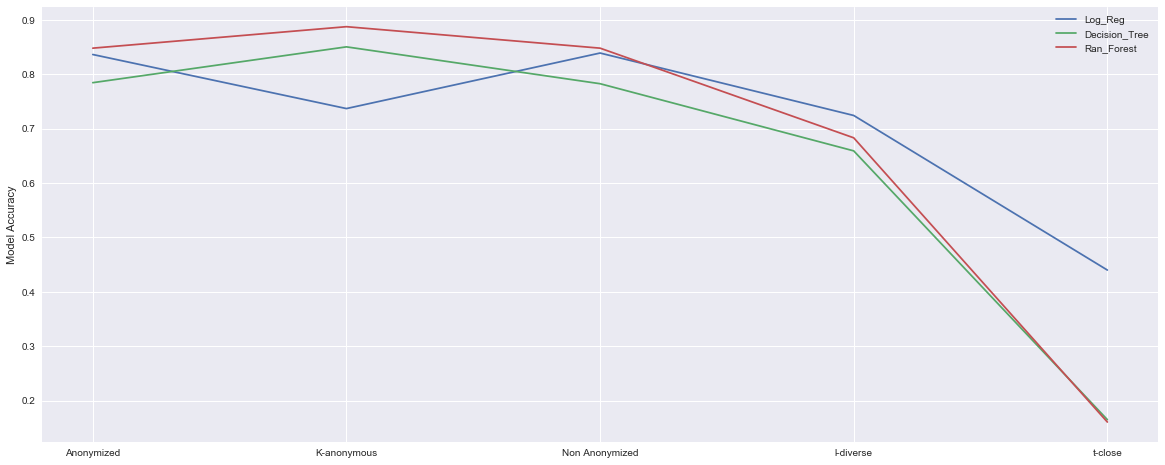

In [193]:
fig= plt.figure(figsize=( 20,8) )
plt.legend(df_all_accuricies)
sns.lineplot(x = ['Non Anonymized', 'Anonymized', 'K-anonymous', 'l-diverse', 't-close'], y = 'Log_Reg', data = df_all_accuricies,markers = 'True')
sns.lineplot(x = ['Non Anonymized', 'Anonymized', 'K-anonymous', 'l-diverse', 't-close'], y = 'Dec_Tree', data = df_all_accuricies)
sns.lineplot(x = ['Non Anonymized', 'Anonymized', 'K-anonymous', 'l-diverse', 't-close'], y = 'Ran_Forest', data = df_all_accuricies)
plt.legend(labels = ['Log_Reg', 'Decision_Tree', 'Ran_Forest'])
plt.ylabel('Model Accuracy')

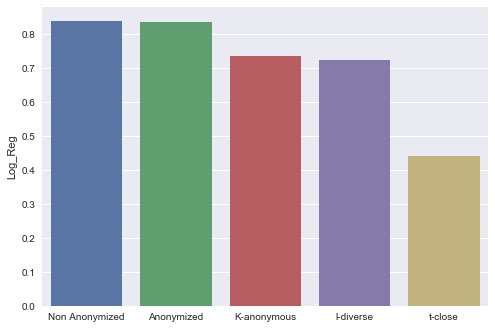

In [181]:
sns.barplot(x = df_all_accuricies.index, y = 'Log_Reg', data = df_all_accuricies)

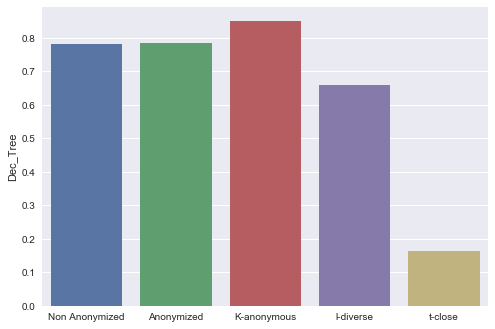

In [182]:
sns.barplot(x = df_all_accuricies.index, y = 'Dec_Tree', data = df_all_accuricies)

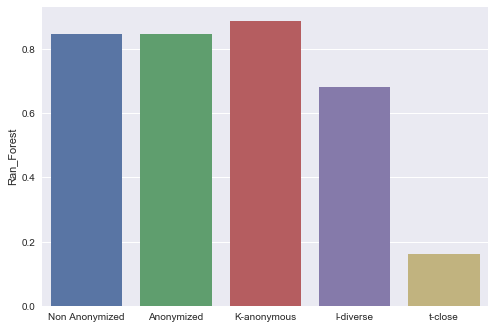

In [183]:
sns.barplot(x = df_all_accuricies.index, y = 'Ran_Forest', data = df_all_accuricies)